# Resumen general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import cohen_kappa_score

In [2]:
anomalias = ['Anomalia','Negro','Congelado','Hum','CurvaCola']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

def calc_metricas(metodos,metodos_lista):
    metodos_metricas = pd.DataFrame(index=metodos_lista,columns=metricas)
    for metodo in metodos_lista:
        metodos_metricas.loc[metodo,metricas[0]] = roc_auc_score(metodos['Anomalia'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[1]] = accuracy_score(metodos['Anomalia'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[2]] = precision_score(metodos['Anomalia'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[3]] = cohen_kappa_score(metodos['Anomalia'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[4]] = recall_score(metodos['Anomalia'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[5]] = recall_score(metodos['Anomalia'], metodos[metodo], pos_label=0)
    return metodos_metricas

def calc_sensibilidad(metodos,metodos_lista,anomalias):
    metodos_sensibilidades = pd.DataFrame(index=metodos_lista, columns=anomalias)
    for metodo in metodos_lista:
        for anomalia in anomalias:
            metodos_sensibilidades.loc[metodo,anomalia] = recall_score(metodos[anomalia], metodos[metodo])
    return metodos_sensibilidades

## Métodos

In [3]:
metodos = pd.read_csv('Metodos/PyOD/Resultados/HBOS_completo.csv',index_col='fecha')
metodos = metodos.drop('Y_pred', axis=1)

metodos['HBOS'] = pd.read_csv('Metodos/PyOD/Resultados/HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['IForest'] = pd.read_csv('Metodos/PyOD/Resultados/IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['KNN'] = pd.read_csv('Metodos/PyOD/Resultados/KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['LODA'] = pd.read_csv('Metodos/PyOD/Resultados/LODA_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PyOD'] = pd.read_csv('Metodos/PyOD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MCD'] = pd.read_csv('Metodos/PyOD/Resultados/MCD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos['IForestASD'] = pd.read_csv('Metodos/PySAD/Resultados/IForestASD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PySAD'] = pd.read_csv('Metodos/PySAD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['SAD'] = pd.read_csv('Metodos/PySAD/Resultados/SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['xStream'] = pd.read_csv('Metodos/PySAD/Resultados/xStream_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_htm = pd.read_csv('Metodos/HTMs/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_htm['HTM'] = metodos_htm['Y_pred']
metodos_htm = metodos_htm.drop('Y_pred',axis=1)

metodos.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,HBOS,IForest,KNN,LODA,MAD_PyOD,MCD,IForestASD,MAD_PySAD,SAD,xStream
fecha,,,,,,,,,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1
2021-03-15 11:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2021-04-17 10:46:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Métricas generales:

In [4]:
metodos_lista = ['HBOS','IForest','KNN','LODA','MAD_PyOD','MCD', 'IForestASD', 'MAD_PySAD','SAD','xStream']
metodos_metricas = calc_metricas(metodos,metodos_lista)
metodos_metricas = pd.concat([metodos_metricas,calc_metricas(metodos_htm, ['HTM'])])
metodos_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.564536,0.801362,0.347539,0.153723,0.207871,0.9212
IForest,0.606131,0.825748,0.468348,0.254026,0.275384,0.936878
KNN,0.532171,0.782351,0.256288,0.076334,0.155397,0.908946
LODA,0.61083,0.828185,0.480738,0.265057,0.28349,0.93817
MAD_PyOD,0.685715,0.889339,0.909417,0.484083,0.379053,0.992376
MCD,0.528716,0.781276,0.247818,0.068385,0.148358,0.909075
IForestASD,0.671777,0.739097,0.336755,0.269064,0.570392,0.773162
MAD_PySAD,0.671182,0.889518,1.0,0.464173,0.342363,1.0
SAD,0.671182,0.889518,1.0,0.464173,0.342363,1.0
xStream,0.674266,0.767246,0.367444,0.295082,0.534236,0.814296


In [5]:
px.line(metodos_metricas.T)

In [6]:
import seaborn as sns
sns.set(style='ticks', font_scale=1, palette = "muted", rc={"font.size":10,"axes.titlesize":25,"axes.labelsize":22, "lines.linewidth": 2})

In [7]:
metodos_metricas = metodos_metricas.sort_values('kappa', ascending=True)

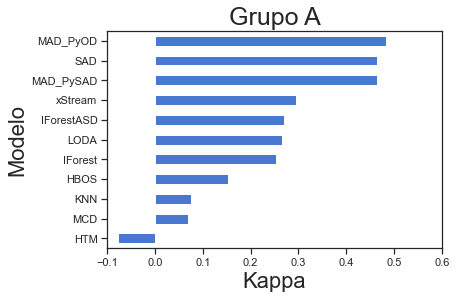

In [37]:
metodos_metricas['kappa'].plot(kind='barh')
plt.xlabel('Kappa')
plt.ylabel('Modelo')
plt.xlim([-0.1,0.6])
plt.title('Grupo A')
plt.show()

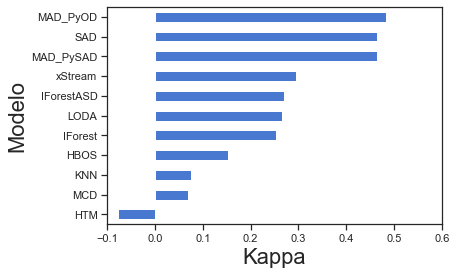

In [8]:
metodos_metricas['kappa'].plot(kind='barh')
plt.xlabel('Kappa')
plt.ylabel('Modelo')
plt.xlim([-0.1,0.6])
plt.show()

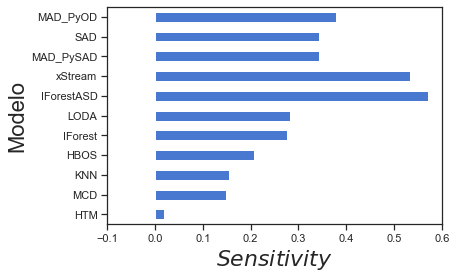

In [9]:
metodos_metricas['sensibilidad'].plot(kind='barh')
plt.xlabel('$\it{Sensitivity}$')
plt.ylabel('Modelo')
plt.xlim([-0.1,0.6])
plt.show()

### Sensibilidad por tipo de anomalía

In [10]:
metodos_sensibilidades = calc_sensibilidad(metodos,metodos_lista,anomalias)
metodos_sensibilidades = pd.concat([metodos_sensibilidades,calc_sensibilidad(metodos_htm, ['HTM'], anomalias)])
metodos_sensibilidades

,Anomalia,Negro,Congelado,Hum,CurvaCola
HBOS,0.207871,0.27432,0.293006,0.866221,0.11543
IForest,0.275384,0.431151,0.485618,0.83612,0.133984
KNN,0.155397,0.174077,0.163001,0.381271,0.125977
LODA,0.28349,0.462409,0.51269,0.852843,0.126953
MAD_PyOD,0.379053,0.737807,0.911732,1.0,0.087109
MCD,0.148358,0.216114,0.119571,0.274247,0.10332
IForestASD,0.570392,0.882242,0.914834,0.986622,0.329102
MAD_PySAD,0.342363,0.731878,0.904681,0.006689,0.082227
SAD,0.342363,0.731878,0.904681,0.006689,0.082227
xStream,0.534236,0.860415,0.902143,0.919732,0.286133


In [11]:
px.line(metodos_sensibilidades.T)

## Métodos NIRvsSecadero

In [12]:
metodos_NvS = pd.read_csv('Metodos_NIRvsSecadero/Total/Resultados/PyOD_IForest_completo.csv',index_col='fecha')
metodos_NvS = metodos_NvS.drop('Y_pred', axis=1)

metodos_NvS['IForest'] = pd.read_csv('Metodos_NIRvsSecadero/Total/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_NvS['MAD'] = pd.read_csv('Metodos_NIRvsSecadero/Total/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_NvS_htm = pd.read_csv('Metodos_NIRvsSecadero/Total/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_NvS_htm['HTM'] = metodos_NvS_htm['Y_pred']
metodos_NvS_htm = metodos_NvS_htm.drop('Y_pred',axis=1)

metodos_NvS.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,IForest,MAD
fecha,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,0,0
2021-03-15 11:15:00,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0
2021-04-17 10:46:00,0,0,0,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0,0


### Métricas generales:

In [13]:
metodos_NvS_lista = ['IForest','MAD']
metodos_NvS_metricas = calc_metricas(metodos_NvS,['IForest','MAD'])
metodos_NvS_metricas = pd.concat([metodos_NvS_metricas,calc_metricas(metodos_NvS_htm, ['HTM'])])
metodos_NvS_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForest,0.673347,0.86196,0.648543,0.412492,0.389292,0.957402
MAD,0.671695,0.879466,0.824712,0.443335,0.358788,0.984602
HTM,0.470918,0.771365,0.048738,-0.076111,0.019996,0.921841


In [14]:
px.line(metodos_NvS_metricas.T)

### Sensibilidad por tipo de anomalía

In [15]:
metodos_NvS_sensibilidades = calc_sensibilidad(metodos_NvS,metodos_NvS_lista,anomalias)
metodos_NvS_sensibilidades = pd.concat([metodos_NvS_sensibilidades,calc_sensibilidad(metodos_NvS_htm, ['HTM'], anomalias)])
metodos_NvS_sensibilidades

,Anomalia,Negro,Congelado,Hum,CurvaCola
IForest,0.389292,0.800593,0.909193,0.137124,0.111719
MAD,0.358788,0.757747,0.900169,0.076923,0.09082
HTM,0.019996,0.0,0.009393,0.01377,0.029206


In [16]:
px.line(metodos_NvS_sensibilidades.T)

## Métodos PVvsPred

In [17]:
metodos_PvP = pd.read_csv('Metodos_PVvsPred/Total/Resultados/PyOD_MAD_completo.csv',index_col='fecha')
metodos_PvP = metodos_PvP.drop('Y_pred', axis=1)

metodos_PvP['MAD_PyOD'] = pd.read_csv('Metodos_PVvsPred/Total/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_PvP['MAD_PySAD'] = pd.read_csv('Metodos_PVvsPred/Total/Resultados/PySAD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_PvP['SAD'] = pd.read_csv('Metodos_PVvsPred/Total/Resultados/PySAD_SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_PvP_htm = pd.read_csv('Metodos_PVvsPred/Total/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_PvP_htm['HTM'] = metodos_PvP_htm['Y_pred']
metodos_PvP_htm = metodos_PvP_htm.drop('Y_pred',axis=1)

metodos_PvP.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,MAD_PyOD,MAD_PySAD,SAD
fecha,,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,0,0,0
2021-03-15 11:15:00,0,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0,0
2021-04-17 10:46:00,0,0,0,0,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0,0,0


### Métricas generales:

In [18]:
metodos_PvP_lista = ['MAD_PyOD','MAD_PySAD','SAD']
metodos_PvP_metricas = calc_metricas(metodos_PvP,metodos_PvP_lista)
metodos_PvP_metricas = pd.concat([metodos_PvP_metricas,calc_metricas(metodos_PvP_htm, ['HTM'])])
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.657336,0.857839,0.63807,0.382252,0.355375,0.959297
MAD_PySAD,0.660535,0.855868,0.62026,0.383755,0.366361,0.95471
SAD,0.660173,0.855761,0.619892,0.383044,0.365614,0.954731
HTM,0.470841,0.771165,0.048831,-0.076258,0.020103,0.921579


In [19]:
px.line(metodos_PvP_metricas.T)

### Sensibilidad por tipo de anomalía

In [20]:
metodos_PvP_sensibilidades = calc_sensibilidad(metodos_PvP,metodos_PvP_lista,anomalias)
metodos_PvP_sensibilidades = pd.concat([metodos_PvP_sensibilidades,calc_sensibilidad(metodos_PvP_htm, ['HTM'], anomalias)])
metodos_PvP_sensibilidades

,Anomalia,Negro,Congelado,Hum,CurvaCola
MAD_PyOD,0.355375,0.739693,0.904681,0.247492,0.091797
MAD_PySAD,0.366361,0.755591,0.904963,0.374582,0.1
SAD,0.365614,0.7564,0.904963,0.351171,0.099414
HTM,0.020103,0.0,0.009563,0.014426,0.029245


In [21]:
px.line(metodos_PvP_sensibilidades.T)

## Métodos SoloHum

In [22]:
metodos_SH = pd.read_csv('Metodos_SoloHumedades/Total/Resultados/PyOD_HBOS_completo.csv',index_col='fecha')
metodos_SH = metodos_SH.drop('Y_pred', axis=1)

metodos_SH['HBOS'] = pd.read_csv('Metodos_SoloHumedades/Total/Resultados/PyOD_HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['IForest'] = pd.read_csv('Metodos_SoloHumedades/Total/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['KNN'] = pd.read_csv('Metodos_SoloHumedades/Total/Resultados/PyOD_KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_SH.head()

,Negro,CurvaCola,Congelado,Hum,Anomalia,HBOS,IForest,KNN
fecha,,,,,,,,
2021-08-01 11:06:00,0,0,0,0,0,0,0,1
2021-03-15 11:15:00,0,0,0,0,0,0,0,0
2021-10-19 07:04:00,0,0,0,0,0,0,0,0
2021-04-17 10:46:00,0,0,0,0,0,0,0,0
2021-03-07 19:50:00,0,0,0,0,0,0,0,0


### Métricas generales:

In [23]:
metodos_SH_lista = ['HBOS','IForest','KNN']
metodos_SH_metricas = calc_metricas(metodos_SH,metodos_SH_lista)
metodos_SH_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.692972,0.880523,0.771343,0.474521,0.410516,0.975427
IForest,0.680885,0.867139,0.676762,0.432202,0.400384,0.961386
KNN,0.551034,0.795467,0.313586,0.122425,0.182914,0.919154


In [24]:
metodos_PvP_metricas = calc_metricas(metodos_PvP, metodos_PvP_lista)
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.657336,0.857839,0.63807,0.382252,0.355375,0.959297
MAD_PySAD,0.660535,0.855868,0.62026,0.383755,0.366361,0.95471
SAD,0.660173,0.855761,0.619892,0.383044,0.365614,0.954731


In [25]:
px.line(metodos_SH_metricas.T)

### Sensibilidad por tipo de anomalía

In [26]:
metodos_SH_sensibilidades = calc_sensibilidad(metodos_SH,metodos_SH_lista,anomalias)
metodos_SH_sensibilidades

,Anomalia,Negro,Congelado,Hum,CurvaCola
HBOS,0.410516,0.84748,0.907783,0.494983,0.114844
IForest,0.400384,0.820264,0.908347,0.494983,0.102344
KNN,0.182914,0.270816,0.286802,0.505017,0.104688


In [27]:
px.line(metodos_SH_sensibilidades.T)

## Resumen Final

In [28]:
resumen_general = pd.concat([metodos_metricas.T.add_suffix('_general'),metodos_NvS_metricas.T.add_suffix('_NvS'),
            metodos_PvP_metricas.T.add_suffix('_PvP'),metodos_SH_metricas.T.add_suffix('_SH')],axis=1).T

resumen_general

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HTM_general,0.470682,0.771401,0.047341,-0.07679,0.019351,0.922013
MCD_general,0.528716,0.781276,0.247818,0.068385,0.148358,0.909075
KNN_general,0.532171,0.782351,0.256288,0.076334,0.155397,0.908946
HBOS_general,0.564536,0.801362,0.347539,0.153723,0.207871,0.9212
IForest_general,0.606131,0.825748,0.468348,0.254026,0.275384,0.936878
LODA_general,0.61083,0.828185,0.480738,0.265057,0.28349,0.93817
IForestASD_general,0.671777,0.739097,0.336755,0.269064,0.570392,0.773162
xStream_general,0.674266,0.767246,0.367444,0.295082,0.534236,0.814296
MAD_PySAD_general,0.671182,0.889518,1.0,0.464173,0.342363,1.0
SAD_general,0.671182,0.889518,1.0,0.464173,0.342363,1.0


In [29]:
px.line(resumen_general.T)

In [30]:
resumen_general_sensibilidades = pd.concat([metodos_sensibilidades.T.add_suffix('_general'),metodos_NvS_sensibilidades.T.add_suffix('_NvS'),
            metodos_PvP_sensibilidades.T.add_suffix('_PvP'),metodos_SH_sensibilidades.T.add_suffix('_SH')],axis=1).T

resumen_general_sensibilidades

,Anomalia,Negro,Congelado,Hum,CurvaCola
HBOS_general,0.207871,0.27432,0.293006,0.866221,0.11543
IForest_general,0.275384,0.431151,0.485618,0.83612,0.133984
KNN_general,0.155397,0.174077,0.163001,0.381271,0.125977
LODA_general,0.28349,0.462409,0.51269,0.852843,0.126953
MAD_PyOD_general,0.379053,0.737807,0.911732,1.0,0.087109
MCD_general,0.148358,0.216114,0.119571,0.274247,0.10332
IForestASD_general,0.570392,0.882242,0.914834,0.986622,0.329102
MAD_PySAD_general,0.342363,0.731878,0.904681,0.006689,0.082227
SAD_general,0.342363,0.731878,0.904681,0.006689,0.082227
xStream_general,0.534236,0.860415,0.902143,0.919732,0.286133


In [31]:
px.line(resumen_general_sensibilidades.T)

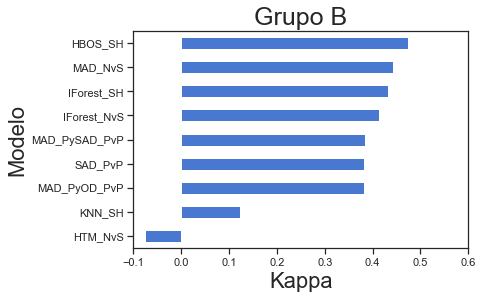

In [36]:
resumen_general_copia = resumen_general.iloc[11:,].sort_values('kappa', ascending=True)
resumen_general_copia['kappa'].plot(kind='barh')
plt.xlabel('Kappa')
plt.ylabel('Modelo')
plt.xlim([-0.1,0.6])
plt.title('Grupo B')
plt.show()

# Resumen Anomalías Thresholds

In [103]:
anomalias = ['Anomalia','Negro','Congelado','Hum']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

## Métodos

In [104]:
metodos = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/HBOS_completo.csv',index_col='fecha')
metodos = metodos.drop('Y_pred', axis=1)

metodos['HBOS'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['IForest'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['KNN'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['LODA'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/LODA_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PyOD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MCD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PyOD/Resultados/MCD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos['IForestASD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PySAD/Resultados/IForestASD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PySAD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PySAD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['SAD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PySAD/Resultados/SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['xStream'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/PySAD/Resultados/xStream_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_htm = pd.read_csv('Metodos_TipoAnomalia/Metodos_Thresholds/HTMs/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_htm['HTM'] = metodos_htm['Y_pred']
metodos_htm = metodos_htm.drop('Y_pred',axis=1)

metodos.head()

,Negro,Congelado,Hum,Anomalia,HBOS,IForest,KNN,LODA,MAD_PyOD,MCD,IForestASD,MAD_PySAD,SAD,xStream
fecha,,,,,,,,,,,,,,
2021-09-25 06:51:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-20 02:11:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-17 02:33:00,0,0,0,0,0,0,1,1,0,0,1,0,0,1
2021-06-25 20:59:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-03-17 22:22:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Métricas generales:

In [105]:
metodos

,Negro,Congelado,Hum,Anomalia,HBOS,IForest,KNN,LODA,MAD_PyOD,MCD,IForestASD,MAD_PySAD,SAD,xStream
fecha,,,,,,,,,,,,,,
2021-09-25 06:51:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-06-20 02:11:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-04-17 02:33:00,0,0,0,0,0,0,1,1,0,0,1,0,0,1
2021-06-25 20:59:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-03-17 22:22:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-11 16:31:00,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2021-04-16 17:15:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-10-03 02:28:00,0,0,0,0,0,0,1,0,0,1,1,0,0,1


In [106]:
metodos_lista = ['HBOS','IForest','KNN','LODA','MAD_PyOD','MCD', 'IForestASD', 'MAD_PySAD','SAD','xStream']
metodos_metricas = calc_metricas(metodos,metodos_lista)
metodos_metricas = pd.concat([metodos_metricas,calc_metricas(metodos_htm, ['HTM'])])
metodos_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.625722,0.871269,0.272709,0.229044,0.331351,0.920092
IForest,0.717724,0.899536,0.412689,0.397323,0.499762,0.935686
KNN,0.545875,0.847243,0.152396,0.08371,0.184586,0.907165
LODA,0.69515,0.89206,0.376365,0.354831,0.459087,0.931212
MAD_PyOD,0.860847,0.969977,0.888021,0.785235,0.730019,0.991676
MCD,0.558238,0.851267,0.171395,0.106436,0.206946,0.909531
IForestASD,0.827566,0.785916,0.262993,0.317617,0.877498,0.777634
MAD_PySAD,0.8534,0.974771,0.983152,0.809926,0.707897,0.998903
SAD,0.845943,0.93887,0.608953,0.632557,0.734539,0.957347
xStream,0.822463,0.801756,0.274634,0.33102,0.847288,0.797638


In [107]:
px.line(metodos_metricas.T)

### Sensibilidad por tipo de anomalía

In [108]:
metodos_sensibilidades = calc_sensibilidad(metodos,metodos_lista,anomalias)
metodos_sensibilidades = pd.concat([metodos_sensibilidades,calc_sensibilidad(metodos_htm, ['HTM'], anomalias)])
metodos_sensibilidades

,Anomalia,Negro,Congelado,Hum
HBOS,0.331351,0.279556,0.29922,0.88172
IForest,0.499762,0.455468,0.533138,0.856631
KNN,0.184586,0.158162,0.153996,0.322581
LODA,0.459087,0.4187,0.4987,0.88172
MAD_PyOD,0.730019,0.732488,0.904808,1.0
MCD,0.206946,0.195246,0.117609,0.344086
IForestASD,0.877498,0.889065,0.936647,0.978495
MAD_PySAD,0.707897,0.726466,0.897661,0.74552
SAD,0.734539,0.738193,0.905133,1.0
xStream,0.847288,0.86561,0.911956,0.942652


In [109]:
px.line(metodos_sensibilidades.T)

## Métodos NIRvsSecadero

In [110]:
metodos_NvS = pd.read_csv('Metodos_NIRvsSecadero/Thresholds/Resultados/PyOD_IForest_completo.csv',index_col='fecha')
metodos_NvS = metodos_NvS.drop('Y_pred', axis=1)

metodos_NvS['IForest'] = pd.read_csv('Metodos_NIRvsSecadero/Thresholds/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_NvS['MAD'] = pd.read_csv('Metodos_NIRvsSecadero/Thresholds/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_NvS_htm = pd.read_csv('Metodos_NIRvsSecadero/Thresholds/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_NvS_htm['HTM'] = metodos_NvS_htm['Y_pred']
metodos_NvS_htm = metodos_NvS_htm.drop('Y_pred',axis=1)

metodos_NvS.head()

,Negro,Congelado,Hum,Anomalia,IForest,MAD
fecha,,,,,,
2021-09-25 06:51:00,0,0,0,0,0,0
2021-06-20 02:11:00,0,0,0,0,0,0
2021-04-17 02:33:00,0,0,0,0,0,0
2021-06-25 20:59:00,0,0,0,0,0,0
2021-03-17 22:22:00,0,0,0,0,0,0


### Métricas generales:

In [111]:
metodos_NvS_lista = ['IForest','MAD']
metodos_NvS_metricas = calc_metricas(metodos_NvS,['IForest','MAD'])
metodos_NvS_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForest,0.843548,0.93666,0.596202,0.622636,0.731922,0.955174
MAD,0.847577,0.935122,0.585851,0.619732,0.742626,0.952528


In [112]:
metodos_NvS_metricas = calc_metricas(metodos_NvS, metodos_NvS_lista)
metodos_NvS_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForest,0.843548,0.93666,0.596202,0.622636,0.731922,0.955174
MAD,0.847577,0.935122,0.585851,0.619732,0.742626,0.952528


In [113]:
px.line(metodos_NvS_metricas.T)

### Sensibilidad por tipo de anomalía

In [114]:
metodos_NvS_sensibilidades = calc_sensibilidad(metodos_NvS,metodos_NvS_lista,anomalias)
metodos_NvS_sensibilidades

,Anomalia,Negro,Congelado,Hum
IForest,0.731922,0.812044,0.903509,0.096774
MAD,0.742626,0.82599,0.903834,0.09319


In [115]:
px.line(metodos_NvS_sensibilidades.T)

## Métodos PVvsPred

In [116]:
metodos_PvP = pd.read_csv('Metodos_PVvsPred/Thresholds/Resultados/PyOD_MAD_completo.csv',index_col='fecha')
metodos_PvP = metodos_PvP.drop('Y_pred', axis=1)

metodos_PvP['MAD_PyOD'] = pd.read_csv('Metodos_PVvsPred/Thresholds/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
#metodos_PvP['MAD_PySAD'] = pd.read_csv('Metodos_PVvsPred/Thresholds/Resultados/PySAD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_PvP['SAD'] = pd.read_csv('Metodos_PVvsPred/Thresholds/Resultados/PySAD_SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_PvP_htm = pd.read_csv('Metodos_PVvsPred/Thresholds/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_PvP_htm['HTM'] = metodos_PvP_htm['Y_pred']
metodos_PvP_htm = metodos_PvP_htm.drop('Y_pred',axis=1)

metodos_PvP.head()

,Negro,Congelado,Hum,Anomalia,MAD_PyOD,SAD
fecha,,,,,,
2021-09-25 06:51:00,0,0,0,0,1,0
2021-06-20 02:11:00,0,0,0,0,0,0
2021-04-17 02:33:00,0,0,0,0,0,0
2021-06-25 20:59:00,0,0,0,0,0,0
2021-03-17 22:22:00,0,0,0,0,0,0


### Métricas generales:

In [117]:
metodos_PvP_lista = ['MAD_PyOD','SAD']
metodos_PvP_metricas = calc_metricas(metodos_PvP,metodos_PvP_lista)
metodos_PvP_metricas = pd.concat([metodos_PvP_metricas,calc_metricas(metodos_PvP_htm, ['HTM'])])
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.846144,0.919795,0.511068,0.567634,0.75785,0.934439
SAD,0.823293,0.931058,0.569144,0.587886,0.694101,0.952485
HTM,0.463891,0.843304,0.010094,-0.075255,0.009198,0.918585


In [118]:
metodos_PvP_metricas = calc_metricas(metodos_PvP, metodos_PvP_lista)
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.846144,0.919795,0.511068,0.567634,0.75785,0.934439
SAD,0.823293,0.931058,0.569144,0.587886,0.694101,0.952485


In [119]:
px.line(metodos_PvP_metricas.T)

### Sensibilidad por tipo de anomalía

In [120]:
metodos_PvP_sensibilidades = calc_sensibilidad(metodos_PvP,metodos_PvP_lista,anomalias)
metodos_PvP_sensibilidades = pd.concat([metodos_PvP_sensibilidades,calc_sensibilidad(metodos_PvP_htm, ['HTM'], anomalias)])
metodos_PvP_sensibilidades

,Anomalia,Negro,Congelado,Hum
MAD_PyOD,0.75785,0.81775,0.899285,0.448029
SAD,0.694101,0.738827,0.898311,0.390681
HTM,0.009198,0.0,0.01124,0.013953


In [121]:
px.line(metodos_PvP_sensibilidades.T)

## Métodos SoloHum

In [122]:
metodos_SH = pd.read_csv('Metodos_SoloHumedades/Thresholds/Resultados/PyOD_HBOS_completo.csv',index_col='fecha')
metodos_SH = metodos_SH.drop('Y_pred', axis=1)

metodos_SH['HBOS'] = pd.read_csv('Metodos_SoloHumedades/Thresholds/Resultados/PyOD_HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['IForest'] = pd.read_csv('Metodos_SoloHumedades/Thresholds/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['KNN'] = pd.read_csv('Metodos_SoloHumedades/Thresholds/Resultados/PyOD_KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH.head()

,Negro,Congelado,Hum,Anomalia,HBOS,IForest,KNN
fecha,,,,,,,
2021-09-25 06:51:00,0,0,0,0,0,0,0
2021-06-20 02:11:00,0,0,0,0,0,0,0
2021-04-17 02:33:00,0,0,0,0,0,0,0
2021-06-25 20:59:00,0,0,0,0,0,0,0
2021-03-17 22:22:00,0,0,0,0,0,0,0


### Métricas generales:

In [123]:
metodos_SH_lista = ['HBOS','IForest','KNN']
metodos_SH_metricas = calc_metricas(metodos_SH,metodos_SH_lista)
metodos_SH_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.88092,0.954808,0.701411,0.719424,0.792341,0.969499
IForest,0.863139,0.943426,0.630673,0.661319,0.766889,0.95939
KNN,0.605612,0.864148,0.240472,0.191258,0.295671,0.915554


In [124]:
metodos_PvP_metricas = calc_metricas(metodos_PvP, metodos_PvP_lista)
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.846144,0.919795,0.511068,0.567634,0.75785,0.934439
SAD,0.823293,0.931058,0.569144,0.587886,0.694101,0.952485


In [125]:
px.line(metodos_SH_metricas.T)

### Sensibilidad por tipo de anomalía

In [126]:
metodos_SH_sensibilidades = calc_sensibilidad(metodos_SH,metodos_SH_lista,anomalias)
metodos_SH_sensibilidades

,Anomalia,Negro,Congelado,Hum
HBOS,0.792341,0.857052,0.902534,0.505376
IForest,0.766889,0.827575,0.89961,0.480287
KNN,0.295671,0.271315,0.2846,0.476703


In [127]:
px.line(metodos_SH_sensibilidades.T)

## Resumen Final

In [128]:
resumen_thresholds = pd.concat([metodos_metricas.T.add_suffix('_general'),metodos_NvS_metricas.T.add_suffix('_NvS'),
            metodos_PvP_metricas.T.add_suffix('_PvP'),metodos_SH_metricas.T.add_suffix('_SH')],axis=1).T

resumen_thresholds

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS_general,0.625722,0.871269,0.272709,0.229044,0.331351,0.920092
IForest_general,0.717724,0.899536,0.412689,0.397323,0.499762,0.935686
KNN_general,0.545875,0.847243,0.152396,0.08371,0.184586,0.907165
LODA_general,0.69515,0.89206,0.376365,0.354831,0.459087,0.931212
MAD_PyOD_general,0.860847,0.969977,0.888021,0.785235,0.730019,0.991676
MCD_general,0.558238,0.851267,0.171395,0.106436,0.206946,0.909531
IForestASD_general,0.827566,0.785916,0.262993,0.317617,0.877498,0.777634
MAD_PySAD_general,0.8534,0.974771,0.983152,0.809926,0.707897,0.998903
SAD_general,0.845943,0.93887,0.608953,0.632557,0.734539,0.957347
xStream_general,0.822463,0.801756,0.274634,0.33102,0.847288,0.797638


In [129]:
px.line(resumen_thresholds.T)

In [130]:
resumen_thresholds_sensibilidades = pd.concat([metodos_sensibilidades.T.add_suffix('_general'),metodos_NvS_sensibilidades.T.add_suffix('_NvS'),
            metodos_PvP_sensibilidades.T.add_suffix('_PvP'),metodos_SH_sensibilidades.T.add_suffix('_SH')],axis=1).T

resumen_thresholds_sensibilidades

,Anomalia,Negro,Congelado,Hum
HBOS_general,0.331351,0.279556,0.29922,0.88172
IForest_general,0.499762,0.455468,0.533138,0.856631
KNN_general,0.184586,0.158162,0.153996,0.322581
LODA_general,0.459087,0.4187,0.4987,0.88172
MAD_PyOD_general,0.730019,0.732488,0.904808,1.0
MCD_general,0.206946,0.195246,0.117609,0.344086
IForestASD_general,0.877498,0.889065,0.936647,0.978495
MAD_PySAD_general,0.707897,0.726466,0.897661,0.74552
SAD_general,0.734539,0.738193,0.905133,1.0
xStream_general,0.847288,0.86561,0.911956,0.942652


In [131]:
px.line(resumen_thresholds_sensibilidades.T)

# Resumen Anomalía CurvaCola

In [132]:
anomalias = ['CurvaCola']
metricas = ['roc_auc','accuracy','precision','kappa','sensibilidad','especificidad']

def calc_metricas(metodos,metodos_lista):
    metodos_metricas = pd.DataFrame(index=metodos_lista,columns=metricas)
    for metodo in metodos_lista:
        metodos_metricas.loc[metodo,metricas[0]] = roc_auc_score(metodos['CurvaCola'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[1]] = accuracy_score(metodos['CurvaCola'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[2]] = precision_score(metodos['CurvaCola'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[3]] = cohen_kappa_score(metodos['CurvaCola'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[4]] = recall_score(metodos['CurvaCola'], metodos[metodo])
        metodos_metricas.loc[metodo,metricas[5]] = recall_score(metodos['CurvaCola'], metodos[metodo], pos_label=0)
    return metodos_metricas

def calc_sensibilidad(metodos,metodos_lista,anomalias):
    metodos_sensibilidades = pd.DataFrame(index=metodos_lista, columns=anomalias)
    for metodo in metodos_lista:
        for anomalia in anomalias:
            metodos_sensibilidades.loc[metodo,anomalia] = recall_score(metodos[anomalia], metodos[metodo])
    return metodos_sensibilidades

## Métodos

In [133]:
metodos = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/HBOS_completo.csv',index_col='fecha')
metodos = metodos.drop('Y_pred', axis=1)

metodos['HBOS'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['IForest'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['KNN'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['LODA'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/LODA_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PyOD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MCD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PyOD/Resultados/MCD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos['IForestASD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PySAD/Resultados/IForestASD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['MAD_PySAD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PySAD/Resultados/MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['SAD'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PySAD/Resultados/SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos['xStream'] = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/PySAD/Resultados/xStream_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_htm = pd.read_csv('Metodos_TipoAnomalia/Metodos_CurvaCola/HTMs/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_htm['HTM'] = metodos_htm['Y_pred']
metodos_htm = metodos_htm.drop('Y_pred',axis=1)

metodos.head()

,CurvaCola,HBOS,IForest,KNN,LODA,MAD_PyOD,MCD,IForestASD,MAD_PySAD,SAD,xStream
fecha,,,,,,,,,,,
2021-11-26 11:48:00,0,0,0,0,0,0,0,0,0,0,0
2021-06-06 19:17:00,0,0,0,0,0,1,0,0,1,1,0
2021-12-04 07:59:00,0,0,0,0,0,0,0,0,0,0,0
2021-11-06 17:55:00,0,0,0,0,0,0,0,0,0,0,0
2021-05-05 08:19:00,0,0,0,1,0,0,0,0,0,0,0


### Métricas generales:

In [134]:
metodos_lista = ['HBOS','IForest','KNN','LODA','MAD_PyOD','MCD', 'IForestASD', 'MAD_PySAD','SAD','xStream']
metodos_metricas = calc_metricas(metodos,metodos_lista)
metodos_metricas = pd.concat([metodos_metricas,calc_metricas(metodos_htm, ['HTM'])])
metodos_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.509429,0.830272,0.102804,0.017534,0.119991,0.898867
IForest,0.510426,0.831722,0.104581,0.019515,0.120436,0.900415
KNN,0.512534,0.834467,0.108424,0.023747,0.121772,0.903296
LODA,0.504172,0.829487,0.09466,0.007799,0.109305,0.899039
MAD_PyOD,0.498623,0.901716,0.069421,-0.004522,0.00935,0.987896
MCD,0.489765,0.825586,0.071762,-0.019215,0.082146,0.897384
IForestASD,0.507783,0.748221,0.094266,0.009833,0.215939,0.799626
MAD_PySAD,0.499211,0.827409,0.086832,-0.00147,0.100846,0.897577
SAD,0.498445,0.894971,0.075564,-0.00478,0.017142,0.979748
xStream,0.502377,0.729007,0.089782,0.002809,0.227293,0.77746


In [135]:
px.line(metodos_metricas.T)

## Métodos NIRvsSecadero

In [136]:
metodos_NvS = pd.read_csv('Metodos_NIRvsSecadero/CurvaCola/Resultados/PyOD_IForest_completo.csv',index_col='fecha')
metodos_NvS = metodos_NvS.drop('Y_pred', axis=1)

metodos_NvS['IForest'] = pd.read_csv('Metodos_NIRvsSecadero/CurvaCola/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_NvS['MAD'] = pd.read_csv('Metodos_NIRvsSecadero/CurvaCola/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_NvS_htm = pd.read_csv('Metodos_NIRvsSecadero/CurvaCola/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_NvS_htm['HTM'] = metodos_NvS_htm['Y_pred']
metodos_NvS_htm = metodos_NvS_htm.drop('Y_pred',axis=1)

metodos_NvS.head()

,CurvaCola,IForest,MAD
fecha,,,
2021-11-26 11:48:00,0,0,0
2021-06-06 19:17:00,0,1,0
2021-12-04 07:59:00,0,0,0
2021-11-06 17:55:00,0,0,0
2021-05-05 08:19:00,0,0,0


### Métricas generales:

In [137]:
metodos_NvS_lista = ['IForest','MAD']
metodos_NvS_metricas = calc_metricas(metodos_NvS,['IForest','MAD'])
metodos_NvS_metricas = pd.concat([metodos_NvS_metricas,calc_metricas(metodos_NvS_htm, ['HTM'])])
metodos_NvS_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
IForest,0.487704,0.82788,0.067756,-0.023489,0.0748,0.900608
MAD,0.495005,0.894383,0.046606,-0.015428,0.01024,0.979769
HTM,0.476849,0.842643,0.03846,-0.049769,0.032524,0.921174


In [138]:
px.line(metodos_NvS_metricas.T)

## Métodos PVvsPred

In [139]:
metodos_PvP = pd.read_csv('Metodos_PVvsPred/CurvaCola/Resultados/PyOD_MAD_completo.csv',index_col='fecha')
metodos_PvP = metodos_PvP.drop('Y_pred', axis=1)

metodos_PvP['MAD_PyOD'] = pd.read_csv('Metodos_PVvsPred/CurvaCola/Resultados/PyOD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_PvP['MAD_PySAD'] = pd.read_csv('Metodos_PVvsPred/CurvaCola/Resultados/PySAD_MAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_PvP['SAD'] = pd.read_csv('Metodos_PVvsPred/CurvaCola/Resultados/PySAD_SAD_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')

metodos_PvP_htm = pd.read_csv('Metodos_PVvsPred/CurvaCola/HTM_Uni/HTM_completo.csv',index_col='fecha')
metodos_PvP_htm['HTM'] = metodos_PvP_htm['Y_pred']
metodos_PvP_htm = metodos_PvP_htm.drop('Y_pred',axis=1)

metodos_PvP.head()

,CurvaCola,MAD_PyOD,MAD_PySAD,SAD
fecha,,,,
2021-11-26 11:48:00,0,0,0,0
2021-06-06 19:17:00,0,0,0,0
2021-12-04 07:59:00,0,0,0,0
2021-11-06 17:55:00,0,0,0,0
2021-05-05 08:19:00,0,0,0,0


### Métricas generales:

In [140]:
metodos_PvP_lista = ['MAD_PyOD','MAD_PySAD','SAD']
metodos_PvP_metricas = calc_metricas(metodos_PvP,metodos_PvP_lista)
metodos_PvP_metricas = pd.concat([metodos_PvP_metricas,calc_metricas(metodos_PvP_htm, ['HTM'])])
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.480482,0.871013,0.01352,-0.051096,0.006456,0.954507
MAD_PySAD,0.464597,0.816547,0.032301,-0.066094,0.0374,0.891794
SAD,0.464095,0.815449,0.032135,-0.066667,0.037622,0.890568
HTM,0.492667,0.896394,0.012792,-0.023342,0.002263,0.98307


In [141]:
px.line(metodos_PvP_metricas.T)

## Métodos SoloHum

In [142]:
metodos_SH = pd.read_csv('Metodos_SoloHumedades/CurvaCola/Resultados/PyOD_HBOS_completo.csv',index_col='fecha')
metodos_SH = metodos_SH.drop('Y_pred', axis=1)

metodos_SH['HBOS'] = pd.read_csv('Metodos_SoloHumedades/CurvaCola/Resultados/PyOD_HBOS_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['IForest'] = pd.read_csv('Metodos_SoloHumedades/CurvaCola/Resultados/PyOD_IForest_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH['KNN'] = pd.read_csv('Metodos_SoloHumedades/CurvaCola/Resultados/PyOD_KNN_completo.csv',usecols=['fecha','Y_pred'],index_col='fecha')
metodos_SH.head()

,CurvaCola,HBOS,IForest,KNN
fecha,,,,
2021-11-26 11:48:00,0,0,0,0
2021-06-06 19:17:00,0,1,0,0
2021-12-04 07:59:00,0,0,0,0
2021-11-06 17:55:00,0,0,0,0
2021-05-05 08:19:00,0,0,0,0


### Métricas generales:

In [143]:
metodos_SH_lista = ['HBOS','IForest','KNN']
metodos_SH_metricas = calc_metricas(metodos_SH,metodos_SH_lista)
metodos_SH_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS,0.47784,0.826762,0.050497,-0.042855,0.054319,0.901361
IForest,0.473223,0.819626,0.045735,-0.050079,0.05276,0.893686
KNN,0.486957,0.824684,0.067289,-0.024485,0.077026,0.896889


In [144]:
metodos_PvP_metricas = calc_metricas(metodos_PvP, metodos_PvP_lista)
metodos_PvP_metricas

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
MAD_PyOD,0.480482,0.871013,0.01352,-0.051096,0.006456,0.954507
MAD_PySAD,0.464597,0.816547,0.032301,-0.066094,0.0374,0.891794
SAD,0.464095,0.815449,0.032135,-0.066667,0.037622,0.890568


In [145]:
px.line(metodos_SH_metricas.T)

## Resumen Final

In [146]:
resumen_curvacola = pd.concat([metodos_metricas.T.add_suffix('_general'),metodos_NvS_metricas.T.add_suffix('_NvS'),
            metodos_PvP_metricas.T.add_suffix('_PvP'),metodos_SH_metricas.T.add_suffix('_SH')],axis=1).T

resumen_curvacola

,roc_auc,accuracy,precision,kappa,sensibilidad,especificidad
HBOS_general,0.509429,0.830272,0.102804,0.017534,0.119991,0.898867
IForest_general,0.510426,0.831722,0.104581,0.019515,0.120436,0.900415
KNN_general,0.512534,0.834467,0.108424,0.023747,0.121772,0.903296
LODA_general,0.504172,0.829487,0.09466,0.007799,0.109305,0.899039
MAD_PyOD_general,0.498623,0.901716,0.069421,-0.004522,0.00935,0.987896
MCD_general,0.489765,0.825586,0.071762,-0.019215,0.082146,0.897384
IForestASD_general,0.507783,0.748221,0.094266,0.009833,0.215939,0.799626
MAD_PySAD_general,0.499211,0.827409,0.086832,-0.00147,0.100846,0.897577
SAD_general,0.498445,0.894971,0.075564,-0.00478,0.017142,0.979748
xStream_general,0.502377,0.729007,0.089782,0.002809,0.227293,0.77746


In [147]:
px.line(resumen_curvacola.T)

# Total

In [148]:
total = pd.concat([resumen_general.T.add_suffix('_general'),resumen_thresholds.T.add_suffix('_thresholds'),resumen_curvacola.T.add_suffix('_curvacola')],axis=1).T
px.line(total.T)